In [504]:
# ==============================================================================
#Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import random
from random import choices
import pymongo
import json
import requests
import ast
# ==============================================================================
# Gráficos
# ==============================================================================
import matplotlib
import matplotlib.pyplot as plt

# ==============================================================================
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [40]:
# ==============================================================================
#Simulación de datos
# ==============================================================================
np.random.seed(0) 

# ==============================================================================
#Dataframe data A 
# ==============================================================================
df_A = pd.DataFrame(np.random.randint(low=1, high=100, size=(400000, 11)) , columns=['Codigo de comercio','Codigo de punto de venta',
                                                      'Codigo de vendedor','Numero de la factura',
                                                       'Monto de la factura Neto','Impuestos de la factura',
                                                      'Monto total de la factura','Monto en efectivo',
                                                       'Monto en tarjeta','Monto en tarjeta_2', 
                                                       'Fecha de la transacción'])
# ==============================================================================
#Dataframe data B   
# ==============================================================================
df_B = pd.DataFrame(producto_np,
                 columns=['Nombre del producto', 'Codigo de producto',
                          'Precio', 'Tipo de producto', 'Puntos del producto'])

df_B=df_B.sample(2000000, replace=True).reset_index(drop=True)
df_B['Numero de la factura'] = df_B.index // 5
df_B['Cantidad de producto vendido'] = np.random.randint(low=1, high=50, size=df_B.shape[0])



# ==============================================================================
#información de lugar de venta
# ==============================================================================
lugar_np=[['LF001', 'La floresta', ['PDV1', 'PDV2', 'PDV3'], ['LF001', 'LF002','LF003', 'LF004']],
['PF001', 'Punto y fama',[ 'PDV1', 'PDV2', 'PDV3','PDV4', 'PDV5'], ['PF001', 'PF002']],
['EBA0001', 'Ebenezer',['PDV1', 'PDV2'], ['EB001']],
['UNICENTRO01', 'Unicentro SAS', ['VEN001', 'VEN002','VEN003', 'VEN004','VEN005'],['EMP001', 'EMP002','EMP004', 'EMP005','EMP006']]]

lugar= np.array(lugar_np)

# ==============================================================================
#información de productos
# ==============================================================================
producto_np=[['Shampoo X', 'X001', 17000, 'CUIDADO PERSONAL',17],
          ['Shampoo Y' ,'X002' ,13000, 'CUIDADO PERSONAL',13],
          ['Desodorante Y' ,'D0001', 6000 ,'CUIDADO PERSONAL',6],
          ['ACETONA X' ,'A0002' ,3000, 'CUIDADO PERSONAL',3],
          ['Pan Sandwich A', 'SA0001', 7000 ,'ALIMENTOS' ,7],
          ['Harina Leudante X','HA0001', 3200, 'ALIMENTOS', 3.2],
          ['Arroz A', 'ARR0001' ,4200, 'ALIMENTOS' ,4.2]]

producto = np.array(producto_np)

#aleatorizar datos de producto
data_lugar=choices(lugar[:,:], k=400000)

C_com=[]
com=[]
C_pv_pre=[]
C_vend_pre=[]
C_pv=[]
C_vend=[]

#Separar variables por categoría
for i in range(len(data_lugar)):
    C_com.append(data_lugar[i][0])
    com.append(data_lugar[i][1])
    #Elegir un item de lista aleatoriamente
    C_pv_pre.append(choices(data_lugar[i][2], k=1))
    C_vend_pre.append(choices(data_lugar[i][3], k=1))
    
#Convertir lista de listas en lista de items para poder asignar al data frame
for lista1 in C_pv_pre:
    for numero in lista1:
        C_pv.append(numero)
for lista2 in C_vend_pre:
    for numero2 in lista2:
        C_vend.append(numero2)
# ==============================================================================       
#fecha de transacción
# ==============================================================================
F=[]
l_f=[]
R=np.random.randint(low=0, high=5, size=(400000))
R.sort()

dias=4
fechas=[]
fecha_1=pd.datetime.now()
fechas.append(fecha_1)

for i in range(1,dias+1):
    fechas.append(fecha_1 + pd.Timedelta(days=i))
    
for fecha in fechas:
    l_f.append(fecha.strftime('%Y-%b-%d'))
    
# ==============================================================================
#Calculo de totales
# ==============================================================================
Neto_pro=[]
Neto_fac=[]
Impu_fac=[]
Tota_fac=[]
Mont_efe=[]
Mont_tar=[]
Mont_tar2=[]

#suma  factura

for i in range(len(df_B['Precio'])):
    Neto_pro.append(df_B['Cantidad de producto vendido'][i]*int(df_B['Precio'][i]))

for i in range(0, len(Neto_pro), 5):
    Neto_fac.append(sum(Neto_pro[i:i+5]))
    
#Impuestos de la factura
for i in range(len(Neto_fac)):
    Impu_fac.append(Neto_fac[i]//100*20)
    
# Monto total de la factura libre de impuestos
for i in range(len(Neto_fac)):
    Tota_fac.append(Neto_fac[i]-Impu_fac[i])
    
# ==============================================================================    
#Distribución de pago efectivo-tarjeta
# ==============================================================================
for i in range(len(Neto_fac)):
    Mont_efe.append((Neto_fac[i]//100)*random.randint(0, 33))
    Mont_tar.append(((Neto_fac[i]-Mont_efe[i])//100)*random.randint(0,50))
    Mont_tar2.append(Neto_fac[i]-Mont_efe[i]-Mont_tar[i])
# ==============================================================================    
#Asignar datos a data frame de producto 'data A' 
# ==============================================================================
df_A['Codigo de comercio']= C_com
df_A['Codigo de punto de venta']= C_pv
df_A['Codigo de vendedor']= C_vend
df_A['Numero de la factura'] = df_A.index 
df_A[ 'Fecha de la transacción'] = np.array(l_f)[R]
df_A['Monto de la factura Neto'] = Neto_fac
df_A['Impuestos de la factura'] = Impu_fac
df_A['Monto total de la factura'] = Tota_fac
df_A['Monto en efectivo'] = Mont_efe
df_A['Monto en tarjeta'] = Mont_tar
df_A['Monto en tarjeta_2'] = Mont_tar2

In [42]:
# ==============================================================================
#Crear archivos CSV con data simulada
# ==============================================================================

df_A.to_csv('Data_A.csv',index=False)
#para B 
df_B.to_csv('Data_B.csv',index=False)

# ==============================================================================
#lectura de archivos CSV con pandas
# ==============================================================================
df_1=pd.read_csv('Data_A.csv') 

df_2=pd.read_csv('Data_B.csv')

In [59]:
# ==============================================================================
#Analisis de datos y estudio
# ==============================================================================


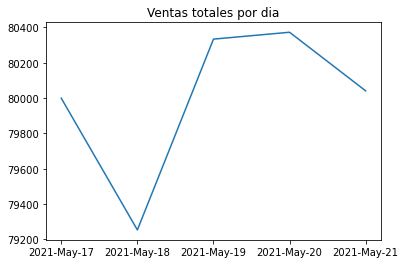

In [58]:
# ==============================================================================
# 1.ventas totales por dia
# ==============================================================================
#Data frame ventas por día
d1=df_1.loc[df_1['Fecha de la transacción'] == l_f[0]]
d2=df_1.loc[df_1['Fecha de la transacción'] == l_f[1]]
d3=df_1.loc[df_1['Fecha de la transacción'] == l_f[2]]
d4=df_1.loc[df_1['Fecha de la transacción'] == l_f[3]]
d5=df_1.loc[df_1['Fecha de la transacción'] == l_f[4]]


Vent_to_d=[len(d1),len(d2),len(d3),len(d4),len(d5)]

#df para enviar a api
dat = {"fecha":l_f,"ventas totales":Vent_to_d}
df_vent_d = pd.DataFrame(dat)


plt.figure()
plt.title('Ventas totales por dia')
plt.plot(l_f,Vent_to_d)

In [276]:
# ==============================================================================
# 2.ventas promedio por dia
# ==============================================================================
Vent_pr_d=[(len(d1)+
len(d2)+
len(d3)+
len(d4)+
len(d5))//len(Vent_to_d)]

#df para enviar a api
df_vent_pr = pd.DataFrame(Vent_pr_d,columns=["Promedio ventas diarias"])

#print('Ventas promedio=',Vent_pr_d[0])
df_vent_pr

,Promedio ventas diarias
0,80000


In [274]:
# ==============================================================================
# 3.cantidad de facturas
# ==============================================================================
cant_fac=[len(df_1)]

#df para enviar a api
df_cant_fac = pd.DataFrame(cant_fac,columns=["Cantidad de facturas"])
df_cant_fac 

,cantidad de facturas
0,400000


<BarContainer object of 1 artists>

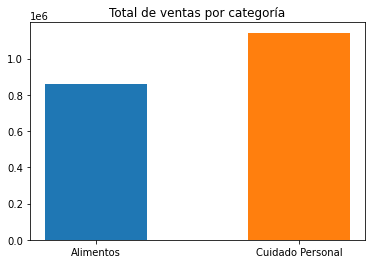

In [104]:
# ==============================================================================
# 4.Total de ventas de la categoría ALIMENTOS
# ==============================================================================
Vent_to_alm=[len(df_2.loc[df_2['Tipo de producto'] == 'ALIMENTOS'])]
#df para enviar a api
df_Vent_to_alm = pd.DataFrame(Vent_to_alm,columns=["Ventas ALIMENTOS"])
# ==============================================================================
# 5.Total de ventas de la categoría  CUIDADO PERSONAL
# ==============================================================================
Vent_to_cup=[len(df_2.loc[df_2['Tipo de producto'] == 'CUIDADO PERSONAL'])]
#df para enviar a api
df_Vent_to_cup = pd.DataFrame(Vent_to_cup,columns=["Ventas CUIDADO PERSONAL"])

plt.figure()
plt.title('Total de ventas por categoría')
plt.bar('Alimentos',Vent_to_alm,0.5)
plt.bar('Cuidado Personal',Vent_to_cup,0.5)



Text(0.5, 1.0, 'Crecimiento de ventas tomando dos días consecutivos')

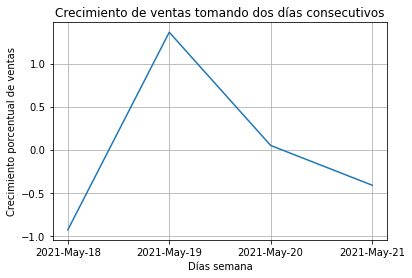

In [112]:
# ==============================================================================
#6. Crecimiento de ventas en dos días consecutivos.
# ==============================================================================
Crec_vent=[]

for i in range(0,4):
    Crec_vent.append(((Vent_to_d[i+1]/ Vent_to_d[i])-1)*100)
#df para enviar a api
df_Crec_vent = pd.DataFrame({"Fecha":l_f[1:],"Crecimiento de ventas":Crec_vent})
    
plt.figure()
plt.grid(True)
plt.xticks([m for m in range(6)])
plt.ylabel('Crecimiento porcentual de ventas')
plt.xlabel('Días semana')
plt.plot(l_f[1:],Crec_vent)
plt.title('Crecimiento de ventas tomando dos días consecutivos')

In [122]:
# ==============================================================================
#Data frame ventas por comercio
# ==============================================================================
Ebenezer=df_1.loc[df_1['Codigo de comercio'] == 'EBA0001']
Unicentro=df_1.loc[df_1['Codigo de comercio'] == 'UNICENTRO01']
Floresta=df_1.loc[df_1['Codigo de comercio'] == 'LF001']
Punto_fama=df_1.loc[df_1['Codigo de comercio'] == 'PF001']
# ==============================================================================
#Data frame ventas por día en comercio
# ==============================================================================
# ==============================================================================
#Ebenezer
# ==============================================================================
Ebenezer_d1=d1.loc[d1['Codigo de comercio'] == 'EBA0001']
Ebenezer_d2=d2.loc[d2['Codigo de comercio'] == 'EBA0001']
Ebenezer_d3=d3.loc[d3['Codigo de comercio'] == 'EBA0001']
Ebenezer_d4=d4.loc[d4['Codigo de comercio'] == 'EBA0001']
Ebenezer_d5=d5.loc[d5['Codigo de comercio'] == 'EBA0001']

Vent_d_Ebenezer=[len(Ebenezer_d1),len(Ebenezer_d2),len(Ebenezer_d3),len(Ebenezer_d4),len(Ebenezer_d5)]
# ==============================================================================
#Unicentro
# ==============================================================================
Unicentro_d1=d1.loc[d1['Codigo de comercio'] == 'UNICENTRO01']
Unicentro_d2=d2.loc[d2['Codigo de comercio'] == 'UNICENTRO01']
Unicentro_d3=d3.loc[d3['Codigo de comercio'] == 'UNICENTRO01']
Unicentro_d4=d4.loc[d4['Codigo de comercio'] == 'UNICENTRO01']
Unicentro_d5=d5.loc[d5['Codigo de comercio'] == 'UNICENTRO01']

Vent_d_Unicentro=[len(Unicentro_d1),len(Unicentro_d2),len(Unicentro_d3),len(Unicentro_d4),len(Unicentro_d5)]
# ==============================================================================
#Floresta
# ==============================================================================
Floresta_d1=d1.loc[d1['Codigo de comercio'] == 'LF001']
Floresta_d2=d2.loc[d2['Codigo de comercio'] == 'LF001']
Floresta_d3=d3.loc[d3['Codigo de comercio'] == 'LF001']
Floresta_d4=d4.loc[d4['Codigo de comercio'] == 'LF001']
Floresta_d5=d5.loc[d5['Codigo de comercio'] == 'LF001']

Vent_d_Floresta=[len(Floresta_d1),len(Floresta_d2),len(Floresta_d3),len(Floresta_d4),len(Floresta_d5)]
# ==============================================================================
#Punto_fama
# ==============================================================================
Punto_fama_d1=d1.loc[d1['Codigo de comercio'] == 'PF001']
Punto_fama_d2=d2.loc[d2['Codigo de comercio'] == 'PF001']
Punto_fama_d3=d3.loc[d3['Codigo de comercio'] == 'PF001']
Punto_fama_d4=d4.loc[d4['Codigo de comercio'] == 'PF001']
Punto_fama_d5=d5.loc[d5['Codigo de comercio'] == 'PF001']

Vent_d_Punto_fama=[len(Punto_fama_d1),len(Punto_fama_d2),len(Punto_fama_d3),len(Punto_fama_d4),len(Punto_fama_d5)]

Text(0.5, 1.0, 'Crecimiento de ventas en dos días consecutivos por comercio.')

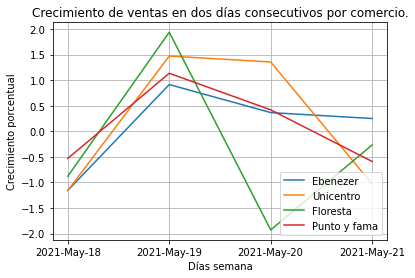

In [123]:
# ==============================================================================
# 7. Crecimiento de ventas en dos días consecutivos por comercio.
# ==============================================================================
Crec_vent_Ebenezer=[]
Crec_vent_Unicentro=[]
Crec_vent_Floresta=[]
Crec_vent_Punto_fama=[]

for i in range(0,4):
    Crec_vent_Ebenezer.append(((Vent_d_Ebenezer[i+1]/ Vent_d_Ebenezer[i])-1)*100)
    Crec_vent_Unicentro.append(((Vent_d_Unicentro[i+1]/ Vent_d_Unicentro[i])-1)*100)
    Crec_vent_Floresta.append(((Vent_d_Floresta[i+1]/ Vent_d_Floresta[i])-1)*100)
    Crec_vent_Punto_fama.append(((Vent_d_Punto_fama[i+1]/ Vent_d_Punto_fama[i])-1)*100)
    
    
#df para enviar a api
df_Crec_vent_c=pd.DataFrame({"Fecha":l_f[1:]})
df_Crec_vent_c['Ebenezer'] = Crec_vent_Ebenezer
df_Crec_vent_c['Unicentro'] = Crec_vent_Unicentro
df_Crec_vent_c['Floresta'] = Crec_vent_Floresta
df_Crec_vent_c['Punto_fama'] = Crec_vent_Punto_fama
    
plt.figure()
plt.grid(True)
plt.xticks([m for m in range(6)])
plt.ylabel('Crecimiento porcentual')
plt.xlabel('Días semana')

plt.plot(l_f[1:],Crec_vent_Ebenezer,label='Ebenezer')
plt.plot(l_f[1:],Crec_vent_Unicentro,label='Unicentro')
plt.plot(l_f[1:],Crec_vent_Floresta,label='Floresta')
plt.plot(l_f[1:],Crec_vent_Punto_fama,label='Punto y fama')
plt.legend(loc='lower right') 
plt.title('Crecimiento de ventas en dos días consecutivos por comercio.')

In [245]:
# ==============================================================================
#Data frame ventas vendedores por comercio
# ==============================================================================
# ==============================================================================
#Ebenezer
# ==============================================================================
EB001=Ebenezer.loc[Ebenezer['Codigo de vendedor'] == 'EB001']

Vent_ven_Ebenezer=[('EB001',len(EB001))]

# ==============================================================================
#Unicentro
# ==============================================================================
EMP001=Unicentro.loc[Unicentro['Codigo de vendedor'] == 'EMP001']
EMP002=Unicentro.loc[Unicentro['Codigo de vendedor'] == 'EMP002']
EMP004=Unicentro.loc[Unicentro['Codigo de vendedor'] == 'EMP004']
EMP005=Unicentro.loc[Unicentro['Codigo de vendedor'] == 'EMP005']
EMP006=Unicentro.loc[Unicentro['Codigo de vendedor'] == 'EMP006']

Vent_ven_Unicentro=[('EMP001',len(EMP001)),('EMP002',len(EMP002)),('EMP004',len(EMP004)),('EMP005',len(EMP005)),('EMP006',len(EMP006))]

# ==============================================================================
#Floresta
# ==============================================================================
LF001=Floresta.loc[Floresta['Codigo de vendedor'] == 'LF001']
LF002=Floresta.loc[Floresta['Codigo de vendedor'] == 'LF002']
LF003=Floresta.loc[Floresta['Codigo de vendedor'] == 'LF003']
LF004=Floresta.loc[Floresta['Codigo de vendedor'] == 'LF004']

Vent_ven_Floresta=[('LF001',len(LF001)),('LF002',len(LF002)),('LF003',len(LF003)),('LF004',len(LF004))]

# ==============================================================================
#Punto_fama
# ==============================================================================
PF001=Punto_fama.loc[Punto_fama['Codigo de vendedor'] == 'PF001']
PF002=Punto_fama.loc[Punto_fama['Codigo de vendedor'] == 'PF002']

Vent_ven_Punto_fama=[('PF001',len(PF001)),('PF002',len(PF002))]


In [537]:
# ==============================================================================
# 8.Top 3 vendedores por establecimiento comercial con total de ventas de cada uno
# ==============================================================================
top_Vent_ven_Ebenezer = sorted(Vent_ven_Ebenezer,reverse=True, key=lambda vendedor : vendedor[1])
top_Vent_ven_Unicentro = sorted(Vent_ven_Unicentro,reverse=True, key=lambda vendedor : vendedor[1])
top_Vent_ven_Floresta = sorted(Vent_ven_Floresta,reverse=True, key=lambda vendedor : vendedor[1])
top_Vent_ven_Punto_fama = sorted(Vent_ven_Punto_fama,reverse=True, key=lambda vendedor : vendedor[1])

#Tupla de top 3 vendedores por establecimiento
top_3_vend=[(top_Vent_ven_Ebenezer[:3]),(top_Vent_ven_Unicentro[:3]),(top_Vent_ven_Floresta[:3]),(top_Vent_ven_Punto_fama[:3])]

#df para enviar a api

df_top_3_vend=pd.DataFrame(top_3_vend,index=["Ebenezer","Unicentro","Floresta","Punto_fama"],columns=["Vendedor1","Vendedor2","Vendedor3"])
df_top_3_vend

,Vendedor1,Vendedor2,Vendedor3
Ebenezer,"(EB001, 100021)",None,None
Unicentro,"(EMP006, 20309)","(EMP002, 20174)","(EMP004, 20169)"
Floresta,"(LF002, 25373)","(LF001, 24974)","(LF004, 24799)"
Punto_fama,"(PF002, 50184)","(PF001, 49806)",None


In [278]:
# ==============================================================================
# Top de ventas por punto de venta de cada establecimiento
# ==============================================================================
# ==============================================================================
#Ebenezer
# ==============================================================================
PDV1=Ebenezer.loc[Ebenezer['Codigo de punto de venta'] == 'PDV1']
PDV2 =Ebenezer.loc[Ebenezer['Codigo de punto de venta'] == 'PDV2']

Vent_PDV_Ebenezer=[('PDV1',len(PDV1)),('PDV2',len(PDV2))]
# ==============================================================================
#Unicentro
# ==============================================================================
VEN001=Unicentro.loc[Unicentro['Codigo de punto de venta'] == 'VEN001']
VEN002=Unicentro.loc[Unicentro['Codigo de punto de venta'] == 'VEN002']
VEN003=Unicentro.loc[Unicentro['Codigo de punto de venta'] == 'VEN003']
VEN004=Unicentro.loc[Unicentro['Codigo de punto de venta'] == 'VEN004']
VEN005=Unicentro.loc[Unicentro['Codigo de punto de venta'] == 'VEN005']

Vent_PDV_Unicentro=[('VEN001',len(VEN001)),('VEN002',len(VEN002)),('VEN003',len(VEN003)),('VEN004',len(VEN004)),('VEN005',len(VEN005))]
# ==============================================================================
#Floresta
# ==============================================================================
PDV1=Floresta.loc[Floresta['Codigo de punto de venta'] == 'PDV1']
PDV2=Floresta.loc[Floresta['Codigo de punto de venta'] == 'PDV2']
PDV3=Floresta.loc[Floresta['Codigo de punto de venta'] == 'PDV3']


Vent_PDV_Floresta=[('PDV1',len(PDV1)),('PDV2',len(PDV2)),('PDV3',len(PDV3))]
# ==============================================================================
#Punto_fama
# ==============================================================================
PDV1=Punto_fama.loc[Punto_fama['Codigo de punto de venta'] == 'PDV1']
PDV2=Punto_fama.loc[Punto_fama['Codigo de punto de venta'] == 'PDV2']
PDV3=Punto_fama.loc[Punto_fama['Codigo de punto de venta'] == 'PDV3']
PDV4=Punto_fama.loc[Punto_fama['Codigo de punto de venta'] == 'PDV4']
PDV5=Punto_fama.loc[Punto_fama['Codigo de punto de venta'] == 'PDV5']

Vent_PDV_Punto_fama=[('PDV1',len(PDV1)),('PDV2',len(PDV2)),('PDV3',len(PDV3)),('PDV4',len(PDV4)),('PDV5',len(PDV5))]


In [516]:
# ==============================================================================
# 9.Top 3 de ventas por punto de venta con el total de ventas de cada punto
# ==============================================================================
top_Vent_PDV_Ebenezer = sorted(Vent_PDV_Ebenezer,reverse=True, key=lambda PDV : PDV[1])
top_Vent_PDV_Unicentro = sorted(Vent_PDV_Unicentro,reverse=True, key=lambda PDV : PDV[1])
top_Vent_PDV_Floresta = sorted(Vent_PDV_Floresta,reverse=True, key=lambda PDV : PDV[1])
top_Vent_PDV_Punto_fama = sorted(Vent_PDV_Punto_fama,reverse=True, key=lambda PDV : PDV[1])

#Tupla de top 3 de ventas por punto de venta
top_3_PDV=[(top_Vent_PDV_Ebenezer[:3]),(top_Vent_PDV_Unicentro[:3]),(top_Vent_PDV_Floresta[:3]),(top_Vent_PDV_Punto_fama[:3])]
#df para enviar a api
df_top_3_PDV=pd.DataFrame(top_3_PDV,index=["Ebenezer","Unicentro","Floresta","Punto_fama"],columns=["Punto de venta1","Punto de venta2","Punto de venta3"])
df_top_3_PDV

,Punto de venta1,Punto de venta2,Punto de venta3
Ebenezer,"(PDV2, 50121)","(PDV1, 49900)",None
Unicentro,"(VEN001, 20165)","(VEN005, 20146)","(VEN003, 20115)"
Floresta,"(PDV2, 33349)","(PDV1, 33194)","(PDV3, 33097)"
Punto_fama,"(PDV3, 20122)","(PDV2, 20068)","(PDV1, 20037)"


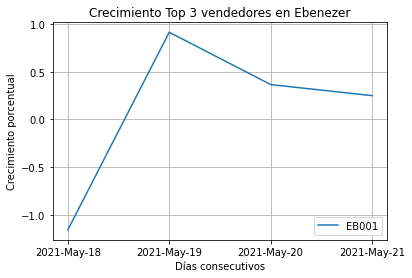

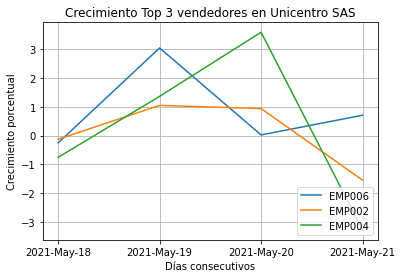

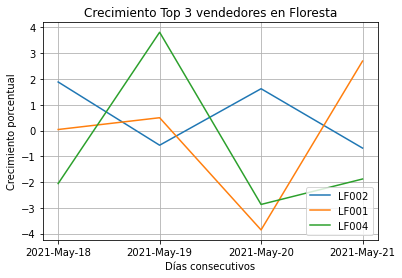

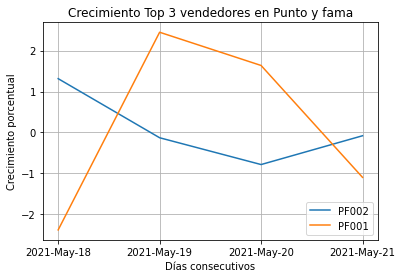

In [386]:
# ==============================================================================
# 10. Grafica de crecimiento de top 3 de vendedores 
# ==============================================================================
Vent_d_vend_Ebenezer=[]
Vent_d_vend_Unicentro=[]
Vent_d_vend_Floresta=[]
Vent_d_vend_Punto_fama=[]
Crec_vendores_Ebenezer=[]
Crec_vendores_Unicentro=[]
Crec_vendores_Floresta=[]
Crec_vendores_Punto_fama=[]
namestopvend=[]
namescom=["Ebenezer","Unicentro","Floresta","Punto_fama"]
for i in range(len(top_3_vend)):
    x=top_3_vend[i]
    plt.figure(i)
    plt.grid(True)
    #plt.title("crecimiento de vendedores top 3", fontdict={'family': 'serif', 'color' : 'darkblue','weight': 'bold','size': 18})
    plt.xticks([m for m in range(6)])
    plt.ylabel('Crecimiento porcentual')
    plt.xlabel('Días consecutivos')
    for j in range(len(x)):
        z=x[j][0]
        namestopvend.append(z)
        Crec_vend_Ebenezer=[]
        Crec_vend_Unicentro=[]
        Crec_vend_Floresta=[]
        Crec_vend_Punto_fama=[]
        
        if i==0:
            
            top_vend=Ebenezer.loc[Ebenezer['Codigo de vendedor'] == z]

            top_vend_d1=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[0]]
            top_vend_d2=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[1]]
            top_vend_d3=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[2]]
            top_vend_d4=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[3]]
            top_vend_d5=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[4]]

            Vent_d_vend_Ebenezer.append([len(top_vend_d1),len(top_vend_d2),len(top_vend_d3),len(top_vend_d4),len(top_vend_d5)])
            
            for k in range(0,4):
                Crec_vend_Ebenezer.append(((Vent_d_vend_Ebenezer[j][k+1]/ Vent_d_vend_Ebenezer[j][k])-1)*100)
            
            Crec_vendores_Ebenezer.append((Crec_vend_Ebenezer,z))   
            plt.plot(l_f[1:],Crec_vend_Ebenezer, label=z)
            plt.legend(loc='lower right') 
            plt.title('Crecimiento Top 3 vendedores en Ebenezer') 
        elif i == 1:
            
            top_vend=Unicentro.loc[Unicentro['Codigo de vendedor'] == z]

            top_vend_d1=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[0]]
            top_vend_d2=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[1]]
            top_vend_d3=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[2]]
            top_vend_d4=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[3]]
            top_vend_d5=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[4]]

            Vent_d_vend_Unicentro.append([len(top_vend_d1),len(top_vend_d2),len(top_vend_d3),len(top_vend_d4),len(top_vend_d5)])
            
            for k in range(0,4):
                Crec_vend_Unicentro.append(((Vent_d_vend_Unicentro[j][k+1]/ Vent_d_vend_Unicentro[j][k])-1)*100)
            
            Crec_vendores_Unicentro.append((Crec_vend_Unicentro,z))
            plt.plot(l_f[1:],Crec_vend_Unicentro, label=z)
            plt.legend(loc='lower right')
            plt.title('Crecimiento Top 3 vendedores en Unicentro SAS')
        elif i == 2:
            
            top_vend=Floresta.loc[Floresta['Codigo de vendedor'] == z]

            top_vend_d1=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[0]]
            top_vend_d2=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[1]]
            top_vend_d3=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[2]]
            top_vend_d4=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[3]]
            top_vend_d5=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[4]]

            Vent_d_vend_Floresta.append([len(top_vend_d1),len(top_vend_d2),len(top_vend_d3),len(top_vend_d4),len(top_vend_d5)])
            
            for k in range(0,4):
                Crec_vend_Floresta.append(((Vent_d_vend_Floresta[j][k+1]/ Vent_d_vend_Floresta[j][k])-1)*100)
            
            Crec_vendores_Floresta.append((Crec_vend_Floresta,z))
            plt.plot(l_f[1:],Crec_vend_Floresta, label=z)
            plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)
            plt.legend(loc='lower right')
            plt.title('Crecimiento Top 3 vendedores en Floresta')
        elif i == 3:
            
            top_vend=Punto_fama.loc[Punto_fama['Codigo de vendedor'] == z]

            top_vend_d1=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[0]]
            top_vend_d2=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[1]]
            top_vend_d3=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[2]]
            top_vend_d4=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[3]]
            top_vend_d5=top_vend.loc[top_vend['Fecha de la transacción'] == l_f[4]]

            Vent_d_vend_Punto_fama.append([len(top_vend_d1),len(top_vend_d2),len(top_vend_d3),len(top_vend_d4),len(top_vend_d5)])
            
            for k in range(0,4):
                Crec_vend_Punto_fama.append(((Vent_d_vend_Punto_fama[j][k+1]/ Vent_d_vend_Punto_fama[j][k])-1)*100)
            
            Crec_vendores_Punto_fama.append((Crec_vend_Punto_fama,z))
            plt.plot(l_f[1:],Crec_vend_Punto_fama, label=z)
            plt.legend(loc='lower right')
            plt.title('Crecimiento Top 3 vendedores en Punto y fama')

plt.show()

In [388]:
df_Crec_vendores=pd.DataFrame(index=[l_f[1:]],columns=[namestopvend])

for i in range(len(Crec_vendores_Ebenezer)):
    df_Crec_vendores[Crec_vendores_Ebenezer[i][1]] = Crec_vendores_Ebenezer[i][0]


for i in range(len(Crec_vendores_Unicentro)):
    df_Crec_vendores[Crec_vendores_Unicentro[i][1]] = Crec_vendores_Unicentro[i][0]


for i in range(len(Crec_vendores_Floresta)):
    df_Crec_vendores[Crec_vendores_Floresta[i][1]] = Crec_vendores_Floresta[i][0]


for i in range(len(Crec_vendores_Punto_fama)):
    df_Crec_vendores[Crec_vendores_Punto_fama[i][1]]= Crec_vendores_Punto_fama[i][0]
    
df_Crec_vendores

,EB001,EMP006,EMP002,EMP004,LF002,LF001,LF004,PF002,PF001
2021-May-18,-1.157569,-0.250564,-0.124657,-0.750939,1.883390,0.039761,-2.057120,1.313547,-2.378324
2021-May-19,0.913680,3.039437,1.048427,1.361917,-0.570305,0.496820,3.813214,-0.128662,2.446546
2021-May-20,0.365164,0.024378,0.938735,3.582981,1.621835,-3.856041,-2.867806,-0.782876,1.635561
2021-May-21,0.249203,0.706800,-1.541850,-3.266875,-0.681199,2.694364,-1.880688,-0.079904,-1.095863


In [393]:
# ==============================================================================
#  Generación de reporte enExcel
# ==============================================================================
with pd.ExcelWriter('Reporte.xlsx') as writer:  
    
    df_vent_d.to_excel(writer,sheet_name='ventas totales por día') 
    df_vent_pr.to_excel(writer,sheet_name='Promedio de ventas') 
    df_cant_fac.to_excel(writer,sheet_name='Cantidad de facturas') 
    df_Vent_to_alm.to_excel(writer,sheet_name='ventas ALIMENTOS')
    df_Vent_to_cup.to_excel(writer,sheet_name='ventas CUIDADO PERSONAL') 
    df_Crec_vent.to_excel(writer,sheet_name='Crecimiento de ventas') 
    df_Crec_vent_c.to_excel(writer,sheet_name='Crecimiento por comercio') 
    df_top_3_vend.to_excel(writer,sheet_name='Top 3 de vendedores') 
    df_top_3_PDV.to_excel(writer,sheet_name='Top 3 punto de venta')
    df_Crec_vendores.to_excel(writer,sheet_name='crecimiento top vendedores')
    

In [538]:
# ==============================================================================
#  Generación JSON para envio de data a api
# ==============================================================================
ventas= ast.literal_eval(df_vent_d .to_json(orient="split"))
promedio_d=ast.literal_eval(df_vent_pr.to_json(orient="split"))
facturas=ast.literal_eval(df_cant_fac.to_json(orient="split"))
ALIMENTOS=ast.literal_eval(df_Vent_to_alm.to_json(orient="split"))
C_PERSONAL=ast.literal_eval(df_Vent_to_cup.to_json(orient="split"))
Crecimiento_v=ast.literal_eval(df_Crec_vent.to_json(orient="split"))
Crecimiento_comercio=ast.literal_eval(df_Crec_vent_c.to_json(orient="split"))
top_3_vendores=df_top_3_vend.to_json(orient="split")
top_3_PuntoDV=df_top_3_PDV.to_json(orient="split")
Crecimiento_Vendedores_top=ast.literal_eval(df_Crec_vendores.to_json(orient="split"))
# ==============================================================================
#  JSON 
# ==============================================================================


In [539]:
# ==============================================================================
#POST data en api
# ==============================================================================

url = 'http://localhost:5000/info'
requests.post(url,json=ventas)
requests.post(url,json=promedio_d)
requests.post(url,json=facturas)
requests.post(url,json=ALIMENTOS)
requests.post(url,json=C_PERSONAL)
requests.post(url,json=Crecimiento_v)
requests.post(url,json=Crecimiento_comercio)
requests.post(url,json=Crecimiento_Vendedores_top)



<Response [201]>

In [ ]:
# ==============================================================================
#pedir data
# ==============================================================================

requests.get('http://localhost:5000/info')
